**IMPORTING THE NECESSARY LIBRARIES**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

**LOADING AND CLEANING THE DATASET**

In [12]:
df = pd.read_csv(r"C:\Users\HOPEL GRAPHICS\Desktop\breast cancer\streamlitapp\data.csv")

In [18]:
df.head() # Display Top 5 Rows of the Dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [20]:
df.isnull().sum() # checking for null or missing values

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [22]:
def get_clean_data():   # Remove unnecessary columns from the dataframe
    df.drop(columns=['Unnamed: 32', 'id'], inplace=True)  # 'Unnamed: 32' is an empty column and 'id' is not useful for prediction or analysis
    df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}) # Convert the 'diagnosis' column from text to numbers
    return df

In [24]:
df = get_clean_data()

In [26]:
df.head() # Display Top 5 Rows of the Dataset after cleaning the data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [28]:
df.tail()  # Display Last 5 Rows of the Dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


**Exploratory Data Analysis**

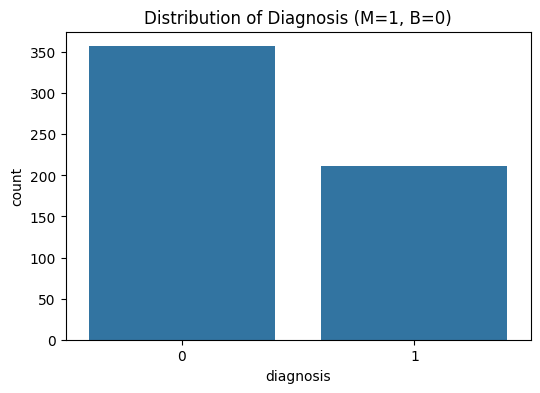

In [32]:
# Plot Diagnosis Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Diagnosis (M=1, B=0)')
plt.show() 

*The chart helps you see if the data is balanced or not.*
*It counts how many patients are malignant (1) and benign (0).*

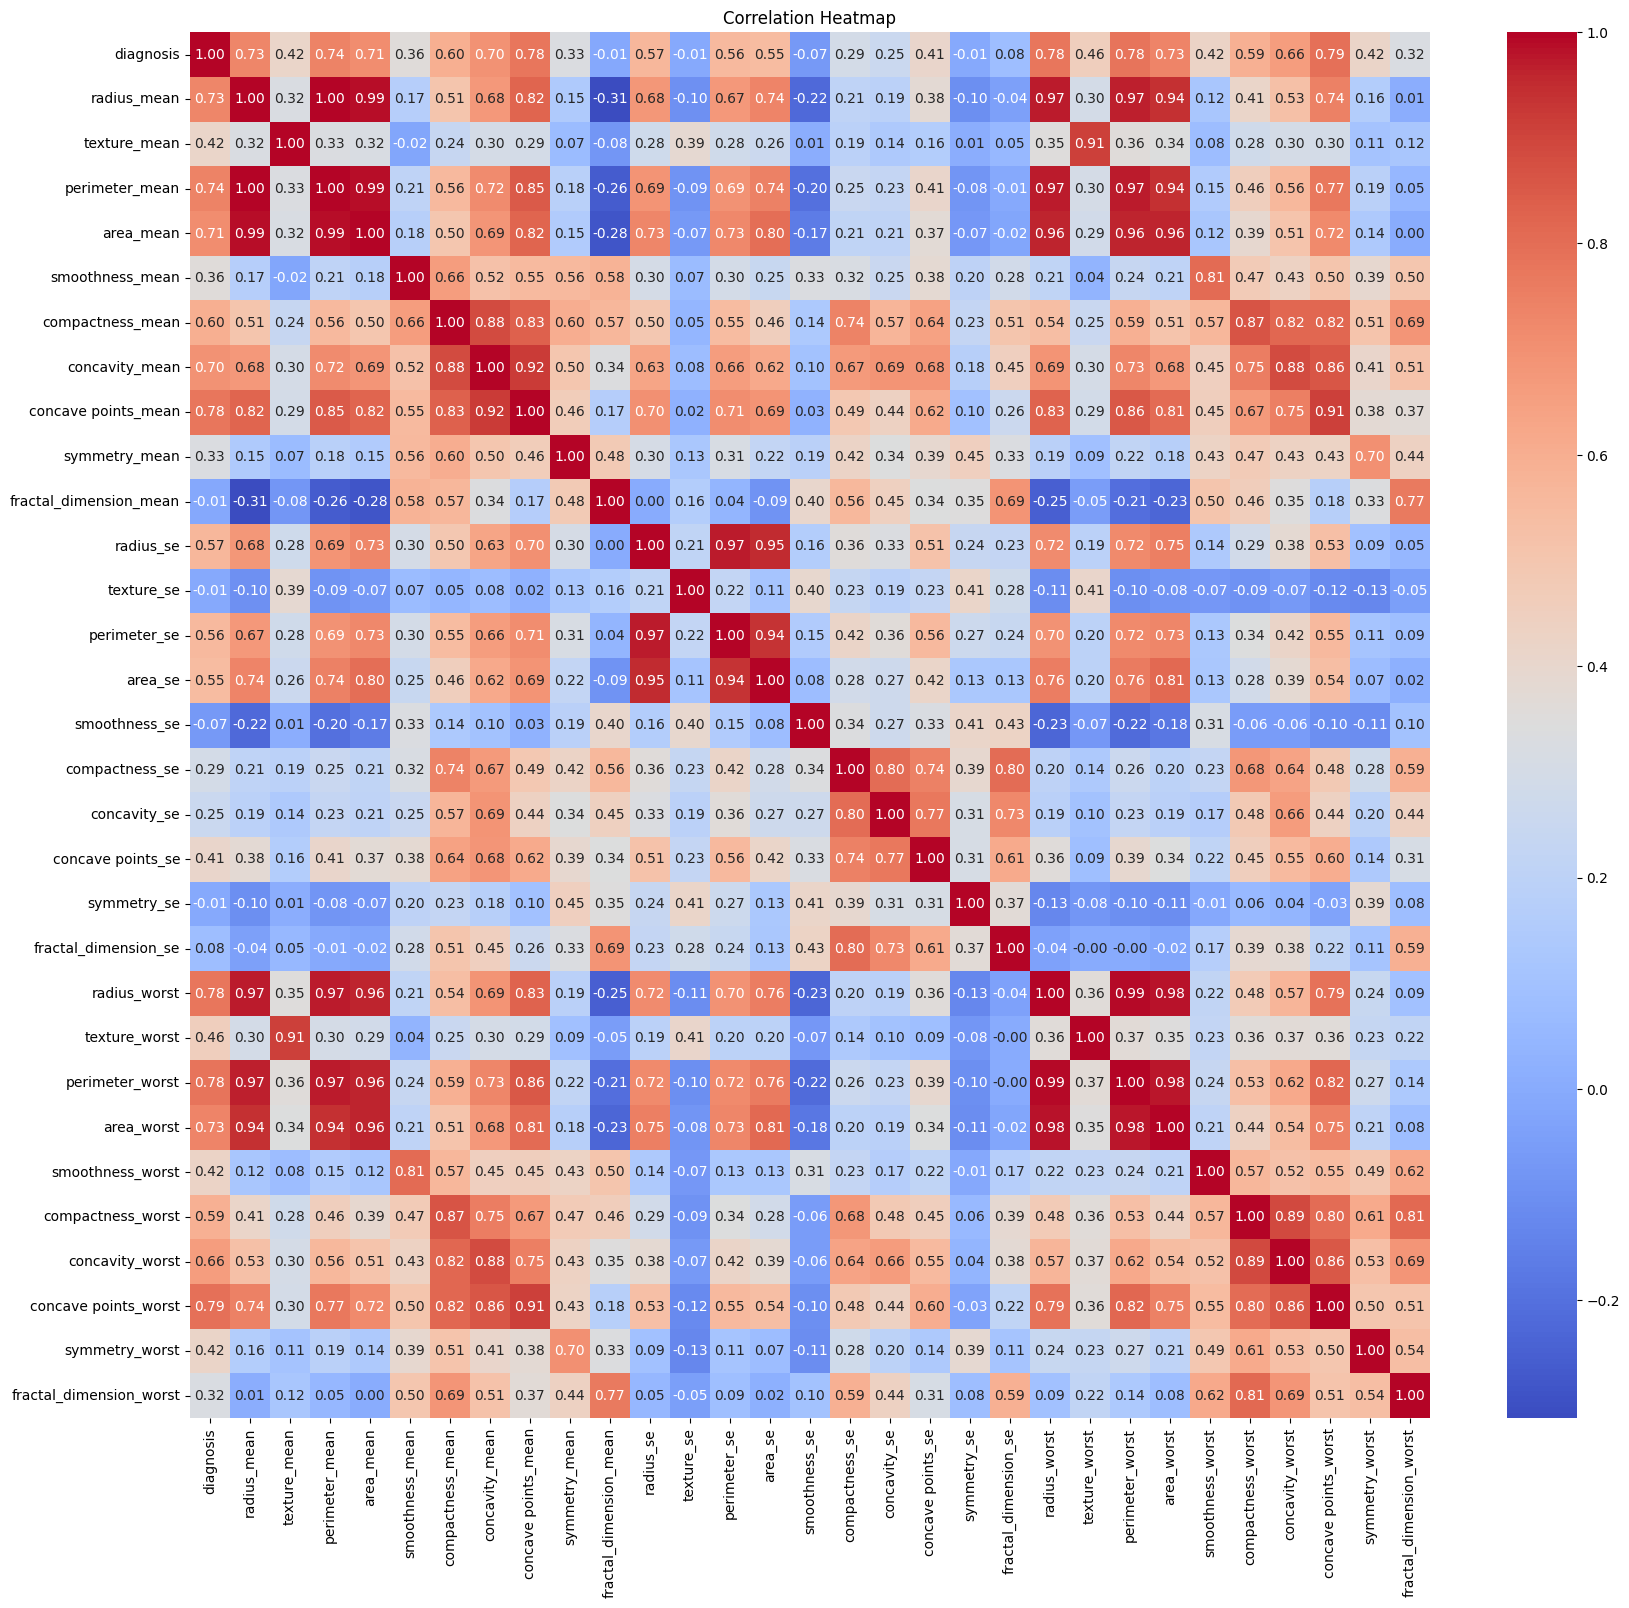

In [39]:
# Plot Correlation Heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**DATA PREPROCESSING**

*Separate features (X) and target (y)*

**I selected only the Top 10 Features, These are the most powerful predictors i found:**

In [102]:
top_10_features = [
    'area_worst', 'concave points_worst', 'concave points_mean', 'radius_worst', 'perimeter_worst',
    'perimeter_mean', 'concavity_mean', 'area_mean', 'concavity_worst', 'radius_mean'
]

X = df[top_10_features]

In [104]:
y = df['diagnosis'] # Target (0 = Benign, 1 = Malignant)

*Split into Training and Testing sets*

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
# 80% of data is used to teach the model, 20% is hidden to test it later

*Feature Scaling*

In [108]:
scaler = StandardScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler for test data
X_test_scaled = scaler.transform(X_test)


**since the data is not balanced i decided to apply Synthetic Minority Over-sampling Technique(SMOTE)**

In [110]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(
    X_train_scaled,
    y_train
)


*By doing this Minority class (Malignant) is synthetically increased which makes both classes become balanced and No data leakage becase the test data is untouched*

In [112]:
pd.Series(y_train_smote).value_counts() # verifying if it's now balanced

diagnosis
1    285
0    285
Name: count, dtype: int64

**MODEL TRAINING AND EVALUATION**

In [136]:
# Initialize the model
lr_model = LogisticRegression()

# Train on the SMOTE-balanced data
# Note: Ensure you are using the SCALED version of your SMOTE data here
lr_model.fit(X_train_smote, y_train_smote)

# Predict on the original test set
# (Never apply SMOTE to the test set! It must remain real data.)
lr_pred = lr_model.predict(X_test_scaled)

# Evaluate
print("--- Logistic Regression---")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

--- Logistic Regression---
Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        72
           1       0.95      0.95      0.95        42

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [132]:
from sklearn.ensemble import RandomForestClassifier

# Initialize
rf_model = RandomForestClassifier(random_state=42)

# Train on SMOTE data
# Random Forest works well with or without scaling, but using the SMOTE data is key
rf_model.fit(X_train_smote, y_train_smote)

# Predict
rf_pred = rf_model.predict(X_test_scaled) 

# Evaluate
print("--- Random Forest ---")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

--- Random Forest ---
Accuracy: 0.9385964912280702
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        72
           1       0.95      0.88      0.91        42

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [144]:
from sklearn.svm import SVC

svm_model = SVC(probability=True, random_state=42)

svm_model.fit(X_train_smote, y_train_smote)

svm_pred = svm_model.predict(X_test_scaled)
print("--- SVM ---")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

--- SVM ---
Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



*A bar chart to compare the 3 model performance*

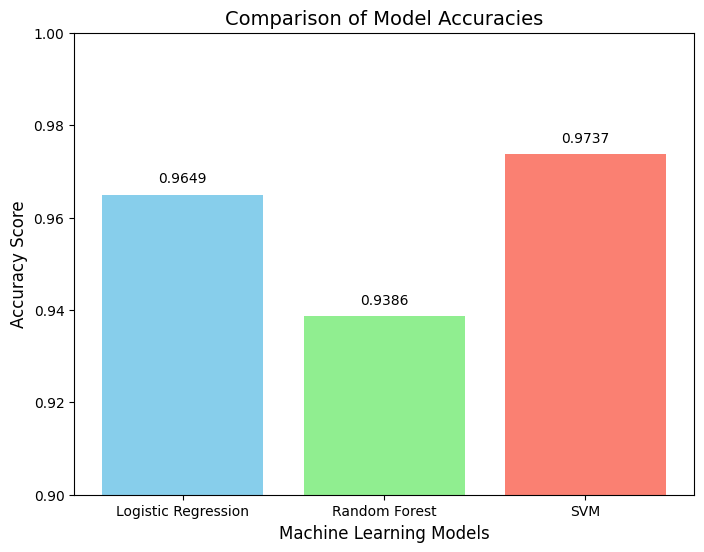

In [142]:
models = ['Logistic Regression', 'Random Forest', 'SVM']
accuracies = [0.9649, 0.9386, 0.9737]

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'salmon'])

# Adding labels and title
plt.xlabel('Machine Learning Models', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.title('Comparison of Model Accuracies', fontsize=14)
plt.ylim(0.9, 1.0)  # Setting limit to zoom in on the differences

# Add text labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.002, f'{yval:.4f}', ha='center', va='bottom')

plt.show()

*Saving the bast model*

In [151]:
import joblib

joblib.dump(svm_model, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')  # we have to also save the scaler

print("Success! Model saved as 'model.pkl'")

Success! Model saved as 'model.pkl'
